# Exploratory data analysis

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from source.utils.dataHandler import DataHandler

In [2]:
# df = pd.read_csv('../Data/export.csv')
data_handler = DataHandler('../data/export.csv')

/Users/daniele/Documents/Università/terzoAnno/primoSemestre/SocialMediaDataAnalysis/Progetto/ShopSmart/source/utils/dataHandler.py:22: DtypeWarning: Columns (12,22) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(filepath)


In [3]:
data_handler.preprocess_data()
data_handler.get_data().head()

,db_sc,id_sc,pv,data,cassa,cassiere,num_scontrino,ora,tessera,t_flag,...,liv4,descr_liv4,liv5,descr_liv5,liv6,descr_liv6,tipologia,descr_tipologia,cod_rep,descr_rep
0,sysevo,52597225,4653,2023-03-25,2,2,248,21:08:00,NaN,V,...,02070201,ARANCIATA ZUCCHERO,NaN,NaN,NaN,NaN,NO,Prodotti Normali,001,ALIMENTARE
1,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,01180203,PARZIALMENTE SCREMATO,NaN,NaN,NaN,NaN,NO,Prodotti Normali,001,ALIMENTARE
2,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,05040402,VASCHETTE,NaN,NaN,NaN,NaN,NO,Prodotti Normali,005,CURA CASA
3,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,03080203,PASTA SFOGLIA,NaN,NaN,NaN,NaN,PM,Prodotti a Marchio Coop,003,BANCO LIBERO SERVIZIO
4,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,03080203,PASTA SFOGLIA,NaN,NaN,NaN,NaN,PM,Prodotti a Marchio Coop,003,BANCO LIBERO SERVIZIO


## 1. Distribution of sales by product

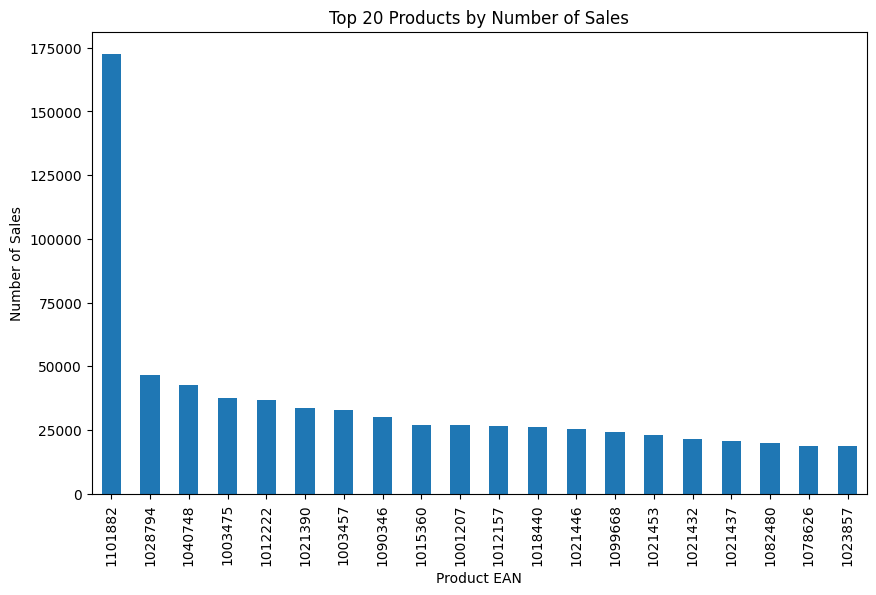

In [4]:
data_handler.distribSales()

## 2. Frequency of customer purchases

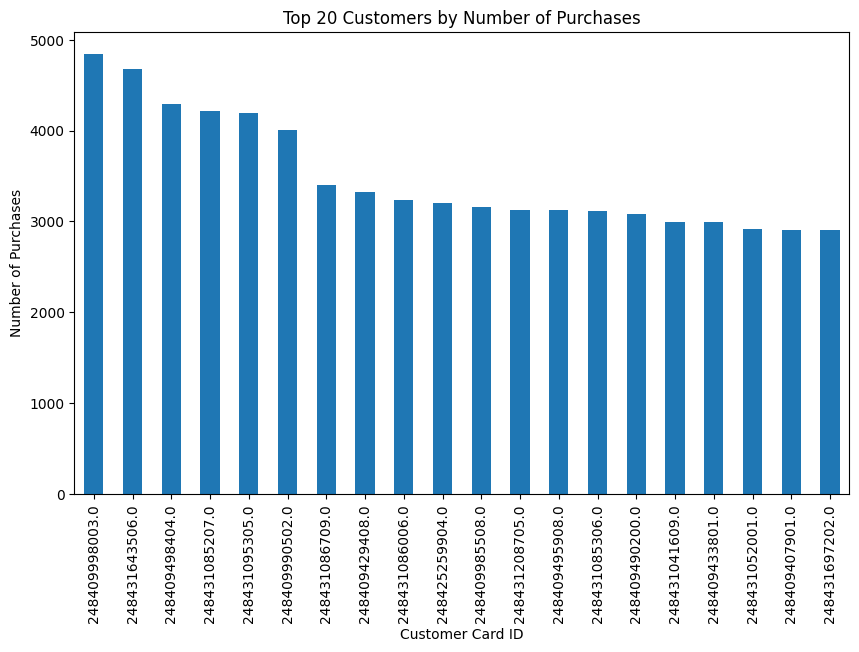

In [5]:
data_handler.freqCustPurch()

## 3. Identification of seasonal or temporal patterns in sales

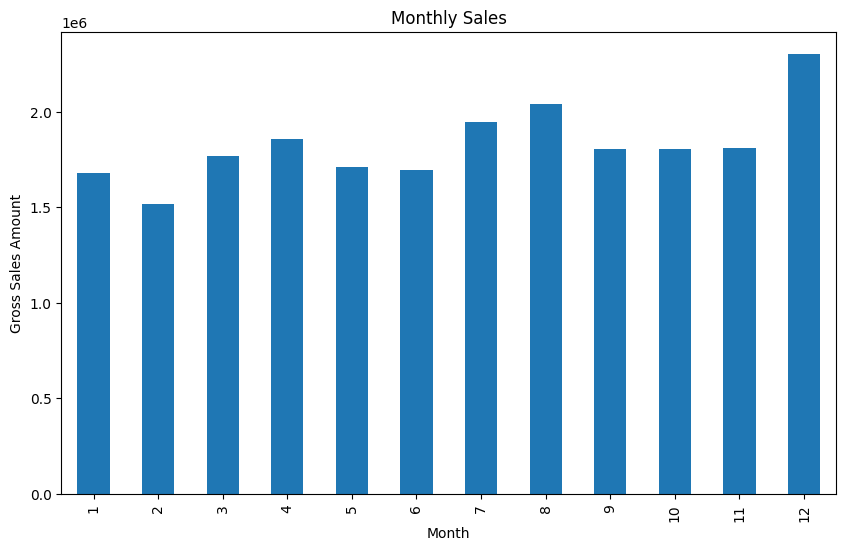

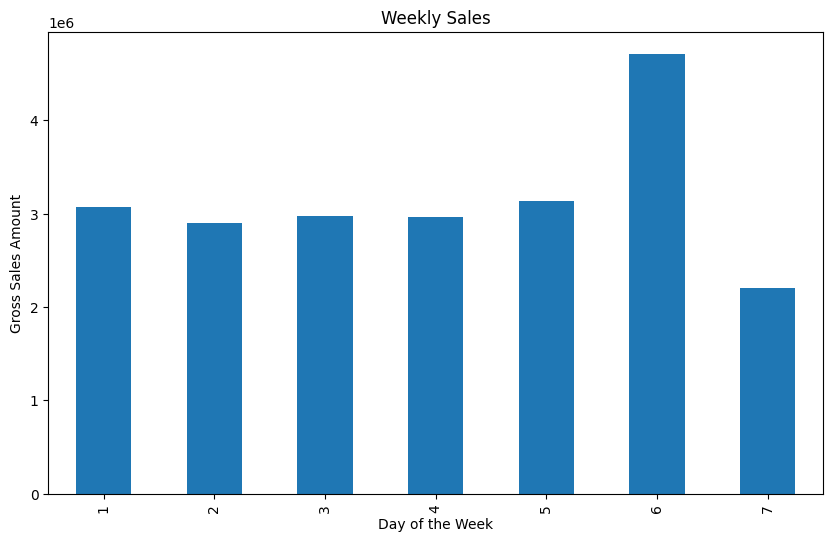

In [6]:
data_handler.plot_sales()